In [ ]:
# the SOLUTION with SKLEARN

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
import pandas as pd 

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving 00 kc_house_data.csv to 00 kc_house_data.csv


In [3]:
data = pd.read_csv("00 kc_house_data.csv")
print(data.head(), "\n\n")

           id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns] 




In [13]:
F = data[["bedrooms", "sqft_living", "price"]]
# have SCALED the DATA using MINMAX FEATURE
# essentially, we do use NORMALIZED DATA
FS = preprocessing.minmax_scale(F)
print(type(FS))
FS[0:3]

<class 'numpy.ndarray'>


array([[0.09090909, 0.06716981, 0.01926557],
       [0.09090909, 0.17207547, 0.06072131],
       [0.06060606, 0.03622642, 0.01377049]])

In [14]:
x = FS[:, 0:2]
y = FS[:, 2]

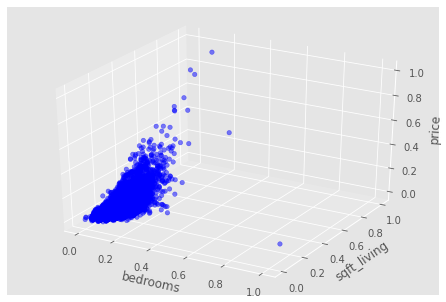

In [17]:
# in order to display the NORMALIZED DATA
# adapting the code from SLIDE 29
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

axis1 = FS[:, 0]
axis2 = FS[:, 1]
axis3 = FS[:, 2]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(axis1, axis2, axis3, c="blue", marker ="o", alpha = 0.5)
ax.set_xlabel("bedrooms")
ax.set_ylabel("sqft_living")
ax.set_zlabel("price")
plt.show()

In [15]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y) 
print(linreg.intercept_)
print(linreg.coef_)

0.012526488915412387
[-0.24697745  0.54555018]


In [18]:
# THE SOLUTION PROVIDED with KERAS

In [8]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense

# we have defined above 
# x = FS[:, 0:2]
# y = FS[:, 2]
# we tra

xx = np.array(x)
yy = np.array(y)

# We already work with NORMALIZED/MIN_MAX SCALED VALUES

model = Sequential()
model.add(Dense(1, input_dim=2, kernel_initializer = "normal", activation = "linear"))

# compile the MODEL
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mse"])

model.summary()

# epochs = 10000
epochs = 1000
hist = model.fit(xx, yy, epochs = epochs, verbose=0)

# get Regression Weights
weightBias = model.layers[0].get_weights()
print("Weights + Bias = ", weightBias)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Weight + Bias =  [array([[-0.24927886],
       [ 0.543768  ]], dtype=float32), array([0.01265647], dtype=float32)]


Text(0.5, 1.0, 'trains_loss')

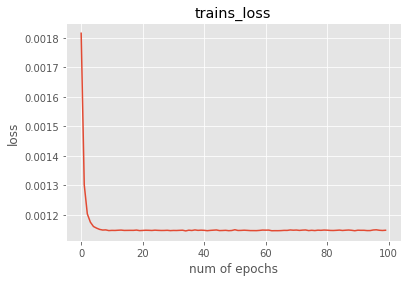

In [12]:
# visualizing the LOSSES
# in this case 1000 epochs did suffice in order to reach the CONVERGENCE

train_loss = hist.history["loss"]
range_epochs = range(epochs)
plt.plot(range_epochs, train_loss)


plt.figure(1, figsize = (7,5))
plt.xlabel("num of epochs")
plt.ylabel("loss")
plt.title("trains_loss")
# plt.grid(True)
# plt.style.use(["ggplot"])